In [62]:
!git remote add origin https://github.com/ebadeco/ml_ebad.git
!git branch -M main
!git push -u origin main

fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git


In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler


In [40]:
# from google.colab import drive
# drive.mount('content/drive/MyDrive/Colab_Notebooks/magic04.data')
cols = ['fLength', 'fwidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
df = pd.read_csv('magic04.data', names=cols)
df.head()

,fLength,fwidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [41]:
# prompt: Using dataframe df: change the class column in to Binary integer which g==1 and h==0

df['class'] = df['class'].replace(['g', 'h'], [1, 0]).astype('int')
df.head()

,fLength,fwidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


#Histogram  and normalization

In [ ]:
for label in cols[:-1]: # all the labels except the last one which is the "class"
  ax1.hist(df[df["class"]==1] [label], color='blue', label='gamma', alpha=0.6, density=True) # when density=True its
  ax1.hist(df[df["class"]==0] [label], color='red', label='hadron', alpha=0.6, density=True) #plot based on Normal distributuin
  ax1.title(f'{label} vs class')
  ax1.ylabel("Probability")
  ax1.xlabel(label)
  ax1.legend() #leave it empty to use default legend gamma and hadron
  ax1.show()



# **Training**, Validation, Test
#


In [43]:
train, valid, test = np.split(df.sample(frac=1), # Shuffle the dataframe
                              [int(0.6 * len(df)), # split the shuffled data at 60% and 80%
                               int(0.8 * len(df))]) # This split create 3 subsets for Training, validation and testing
# The scales of these labels data are way off for example the "flength=160.08" and "fconc = 0.01807"--> so much high
# So we use the scaler of median adn standard deviation for each column
def scale_dataset(dataframe, oversample = False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values
# here we impoert the sklearn.preprocessing the StandardScaler in order to Data Normalization-convert Max data=1 and Min=0
  scaler = StandardScaler()
  X = scaler.fit_transform(X) # Here we pass the scaler to X values
#print(len(train[train['class']==1]))gamma we understand that the amount of data for the gamma and hadron is not eqyual
#print(len(train[train['class']==0]))hadron ...and this is important for training not for validation and test-->oversample train data
  if oversample:
      ros = RandomOverSampler()
      X, y = ros.fit_resample(X, y)
  data = np.hstack((X, np.reshape(y, (-1, 1)))) # Here X is a 2D Array but y is a 1D vector so we use reshape to convert y to a matrices
  #with 2 array [1, 0, 1, 1, 1, 0, 0]--> [[1], [0], [1], [1], [1], [0], [0]]
  return data, X, y

In [44]:
train, Xtrain, ytrain = scale_dataset(train, oversample = True)
valid, Xvalid, yvalid = scale_dataset(valid, oversample= False)
test, Xtest, ytest = scale_dataset(test, oversample= False)
# print(len(ytrain))
# sum(ytrain==1)
# sum(ytrain==0)

KNN k Nearest Neighbor (Clasiification model)

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
knn_model = KNeighborsClassifier(n_neighbors=1) #change the number of neighbors to get a different result
knn_model.fit(Xtrain, ytrain)

KNeighborsClassifier(n_neighbors=1)

In [46]:
ypred = knn_model.predict(Xtest)
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.74      0.65      0.69      1341
           1       0.82      0.87      0.85      2463

    accuracy                           0.79      3804
   macro avg       0.78      0.76      0.77      3804
weighted avg       0.79      0.79      0.79      3804



Naive_Bayes (the total test result altogether is worse than the KNN test)  (Clasiification model)

In [47]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(Xtrain, ytrain)
ypred = nb_model.predict(Xtest)
print(classification_report(ytest, ypred))


              precision    recall  f1-score   support

           0       0.64      0.40      0.49      1341
           1       0.73      0.88      0.80      2463

    accuracy                           0.71      3804
   macro avg       0.68      0.64      0.64      3804
weighted avg       0.70      0.71      0.69      3804



In [48]:
# from google.colab import drive
# drive.mount('/content/drive')

Logestic Regression (Clasiification model)

In [49]:
from sklearn.linear_model import LogisticRegression
lg_reg = LogisticRegression()
lg_reg.fit(Xtrain, ytrain)
ypred = lg_reg.predict(Xtest)
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.67      0.70      0.68      1341
           1       0.83      0.81      0.82      2463

    accuracy                           0.77      3804
   macro avg       0.75      0.75      0.75      3804
weighted avg       0.77      0.77      0.77      3804



SVM (Support Vector Machine) -- (Classification model)
SVC--> Support Vector Classifire

In [50]:
from sklearn.svm import SVC
svm_model = SVC(probability=True)
svm_model.fit(Xtrain, ytrain)
ypred=svm_model.predict(Xtest)
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79      1341
           1       0.89      0.89      0.89      2463

    accuracy                           0.85      3804
   macro avg       0.84      0.84      0.84      3804
weighted avg       0.85      0.85      0.85      3804



Neural Network by TensorFlow

In [51]:
import tensorflow as tf
from tensorflow import keras

In [52]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.legend()
  ax1.grid(True)
  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label= 'val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.legend()
  ax2.grid(True)
  plt.show()

In [53]:
# nn_model = tf.keras.Sequential([
#     tf.keras.layers.Dense(32, activation='relu', input_shape=(10,)),
#     tf.keras.layers.Dense(32, activation='relu'),
#     tf.keras.layers.Dense(1, activation='sigmoid')
# ])

# nn_model.compile(
#       optimizer=tf.keras.optimizers.Adam(0.001), loss='binary_crossentropy',
#       metrics = ['accuracy'])
# I change this code snippets in to grid search ahead--> and keep it for furthure self learnings.

In [54]:
# history = nn_model.fit(
#     Xtrain, ytrain, batch_size=32, epochs=100, validation_split=0.2
# )

**"Grid search"** is a technique used in machine learning and neural networks to find the best combination of hyperparameters for a given model. Hyperparameters are parameters that are set before training and aren't learned from the data (e.g., learning rate, number of hidden layers, dropout rates, etc.). Grid search involves systematically exploring a predefined set of hyperparameters to identify the optimal configuration for a model.

In [55]:
def train_model(Xtrain, ytrain, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=keras.optimizers.Adam(lr), loss='binary_crossentropy',
                    metrics=['accuracy'])
  history=nn_model.fit(Xtrain, ytrain, batch_size=batch_size, epochs=epochs, validation_split=0.2, verbose=0)
  return  nn_model, history

num_nodes:32, dropout_prob:0, 'LR':0.01, batch_size:32


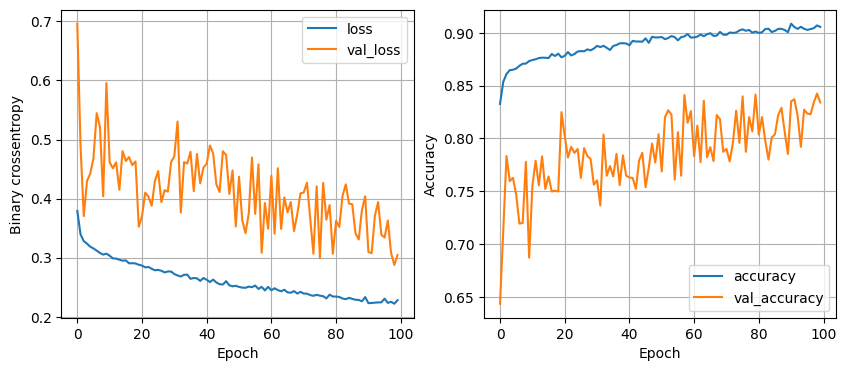

119/119 [==============================] - 0s 1ms/step - loss: 0.3977 - accuracy: 0.8575
num_nodes:32, dropout_prob:0, 'LR':0.01, batch_size:64


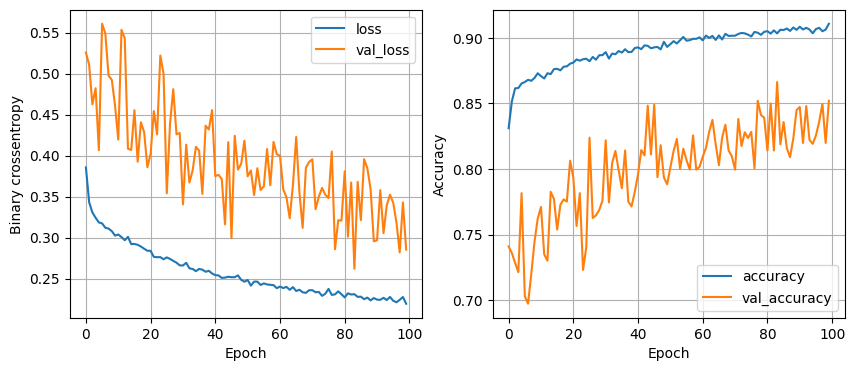

119/119 [==============================] - 0s 2ms/step - loss: 0.4148 - accuracy: 0.8486
num_nodes:32, dropout_prob:0, 'LR':0.01, batch_size:128


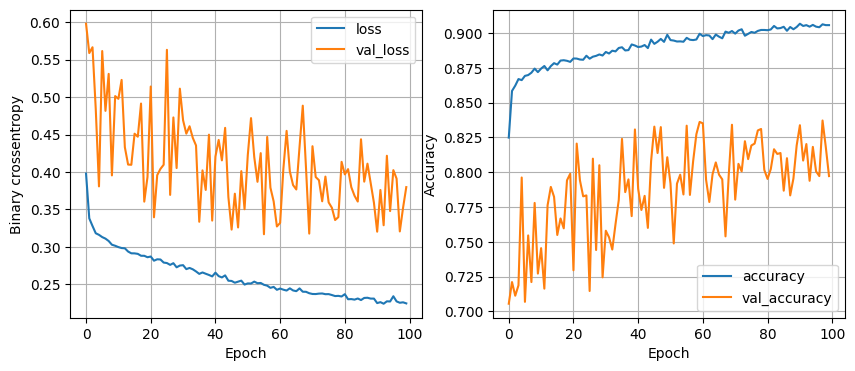

119/119 [==============================] - 0s 2ms/step - loss: 0.3977 - accuracy: 0.8591
num_nodes:32, dropout_prob:0, 'LR':0.005, batch_size:32


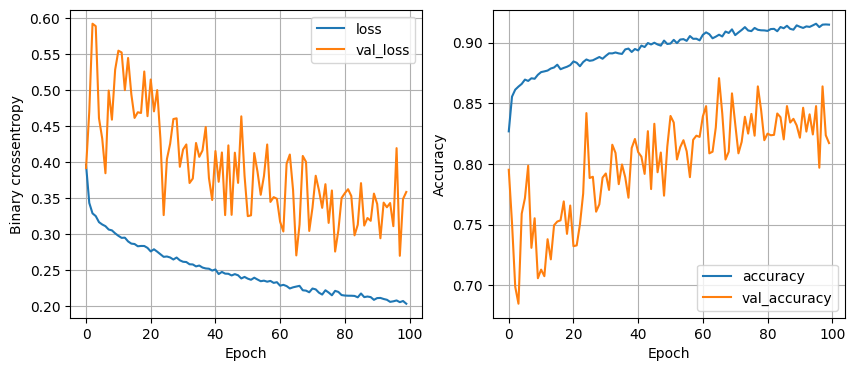

119/119 [==============================] - 0s 2ms/step - loss: 0.4328 - accuracy: 0.8541
num_nodes:32, dropout_prob:0, 'LR':0.005, batch_size:64


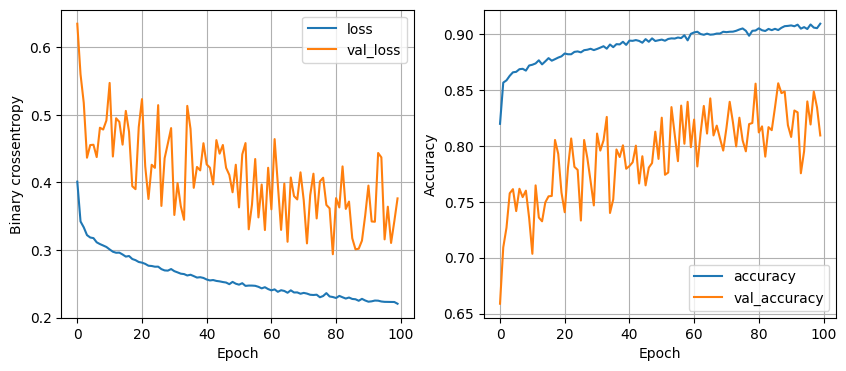

119/119 [==============================] - 0s 1ms/step - loss: 0.3773 - accuracy: 0.8604
num_nodes:32, dropout_prob:0, 'LR':0.005, batch_size:128


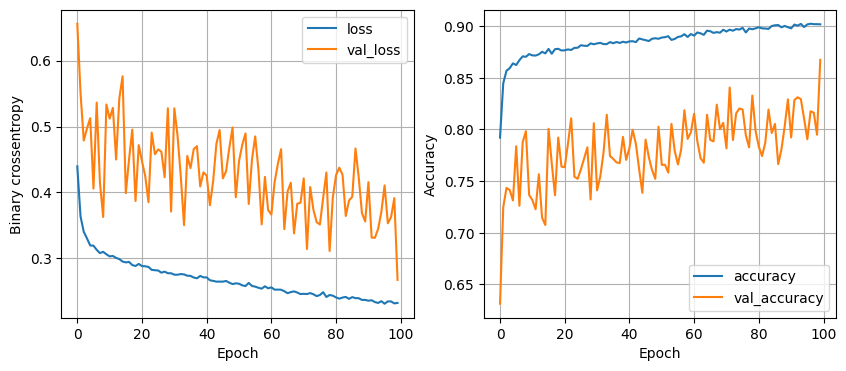

119/119 [==============================] - 0s 2ms/step - loss: 0.4135 - accuracy: 0.8462
num_nodes:32, dropout_prob:0, 'LR':0.001, batch_size:32


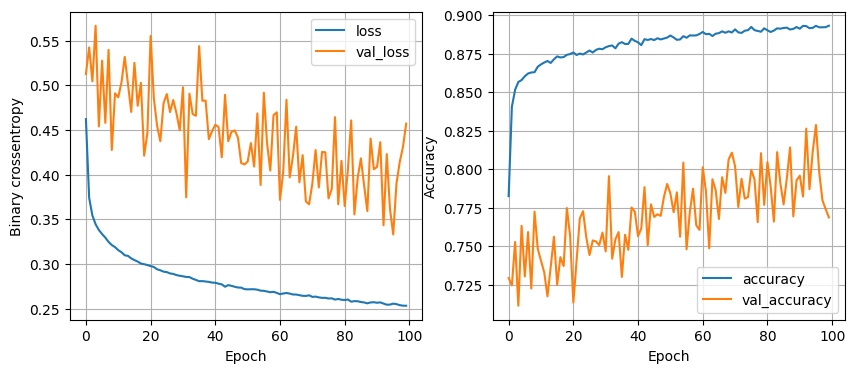

119/119 [==============================] - 0s 1ms/step - loss: 0.3385 - accuracy: 0.8678
num_nodes:32, dropout_prob:0, 'LR':0.001, batch_size:64


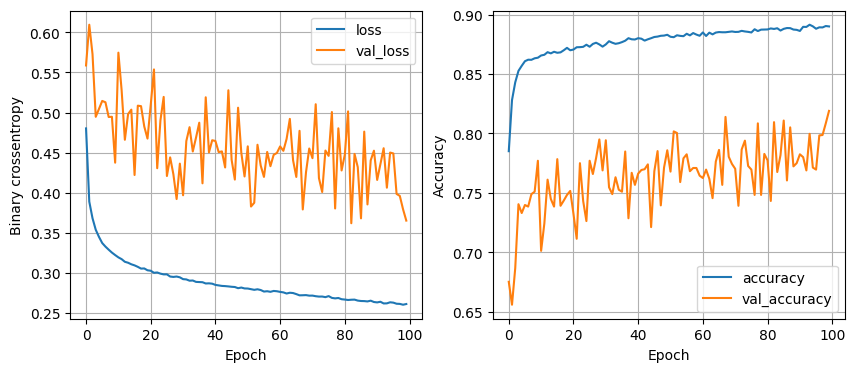

119/119 [==============================] - 0s 2ms/step - loss: 0.3444 - accuracy: 0.8573
num_nodes:32, dropout_prob:0, 'LR':0.001, batch_size:128


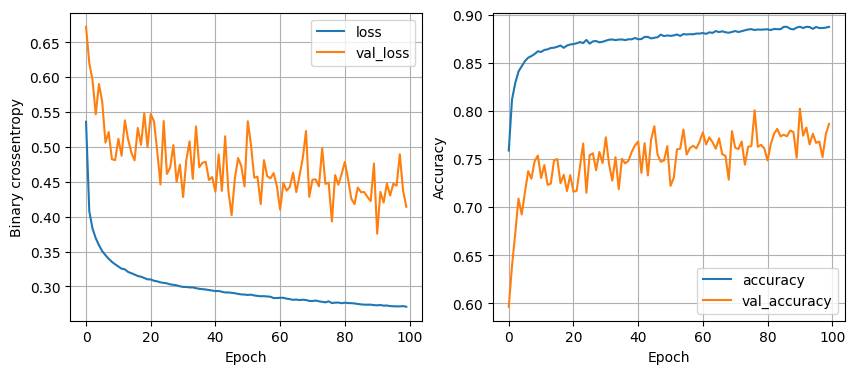

119/119 [==============================] - 0s 2ms/step - loss: 0.3211 - accuracy: 0.8644
num_nodes:32, dropout_prob:0.2, 'LR':0.01, batch_size:32


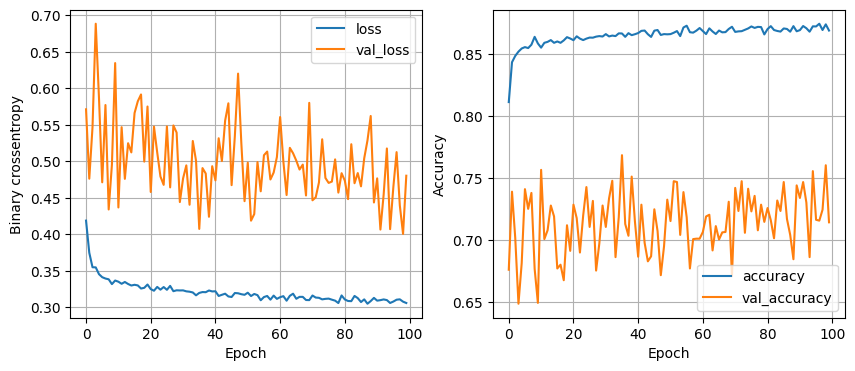

119/119 [==============================] - 0s 2ms/step - loss: 0.3246 - accuracy: 0.8644
num_nodes:32, dropout_prob:0.2, 'LR':0.01, batch_size:64


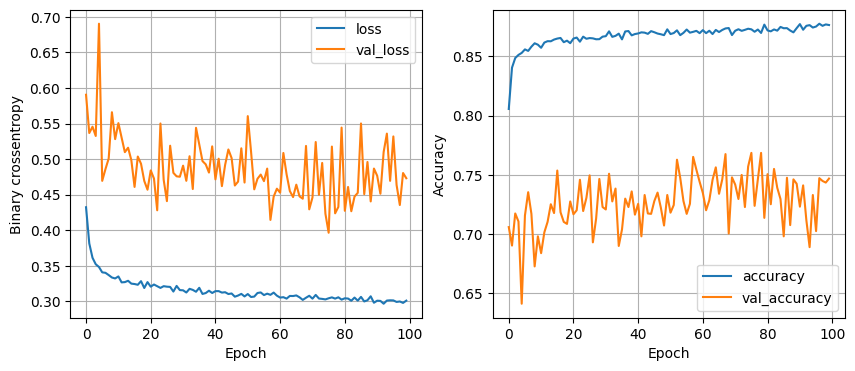

119/119 [==============================] - 0s 2ms/step - loss: 0.3125 - accuracy: 0.8699
num_nodes:32, dropout_prob:0.2, 'LR':0.01, batch_size:128


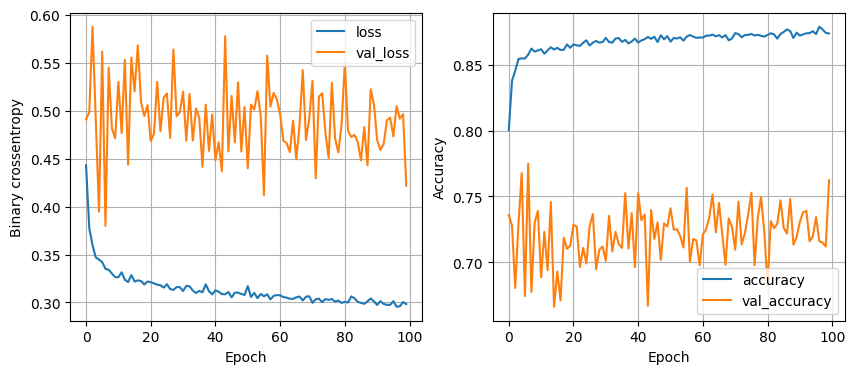

119/119 [==============================] - 0s 2ms/step - loss: 0.3105 - accuracy: 0.8746
num_nodes:32, dropout_prob:0.2, 'LR':0.005, batch_size:32


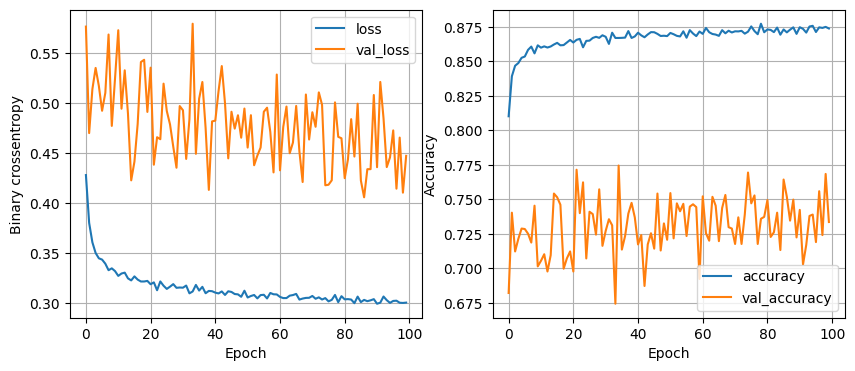

119/119 [==============================] - 0s 2ms/step - loss: 0.3149 - accuracy: 0.8691
num_nodes:32, dropout_prob:0.2, 'LR':0.005, batch_size:64


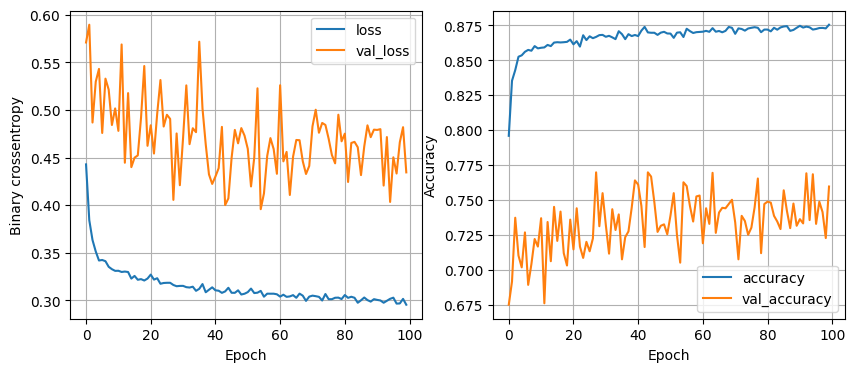

119/119 [==============================] - 0s 2ms/step - loss: 0.3107 - accuracy: 0.8688
num_nodes:32, dropout_prob:0.2, 'LR':0.005, batch_size:128


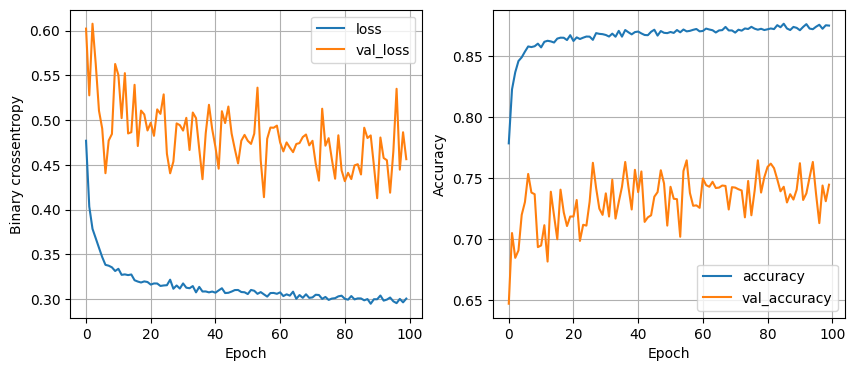

119/119 [==============================] - 0s 2ms/step - loss: 0.3099 - accuracy: 0.8715
num_nodes:32, dropout_prob:0.2, 'LR':0.001, batch_size:32


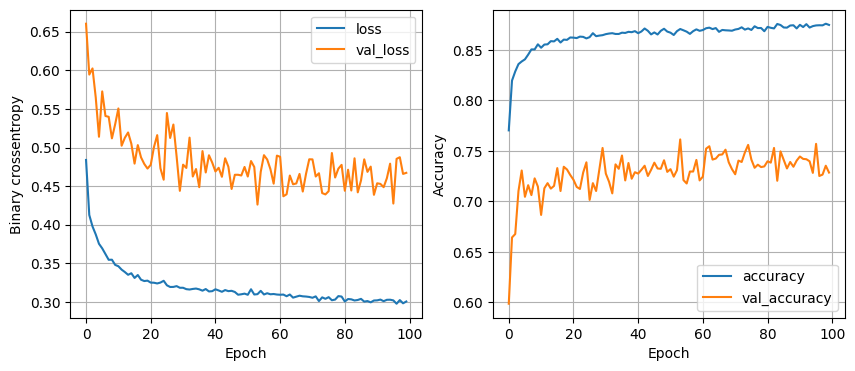

119/119 [==============================] - 0s 2ms/step - loss: 0.3086 - accuracy: 0.8725
num_nodes:32, dropout_prob:0.2, 'LR':0.001, batch_size:64


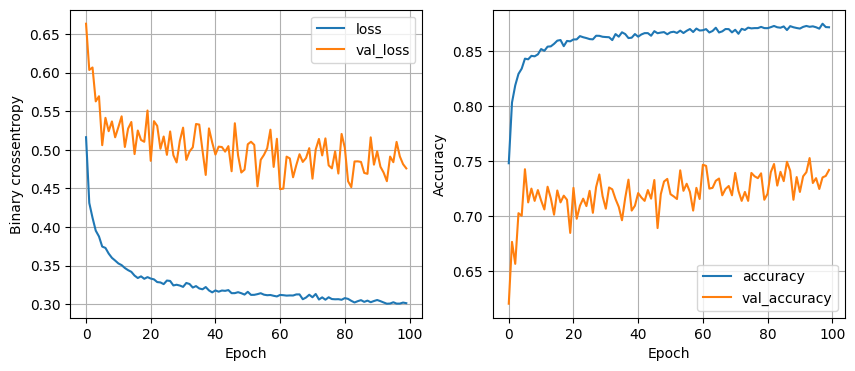

119/119 [==============================] - 0s 2ms/step - loss: 0.3071 - accuracy: 0.8696
num_nodes:32, dropout_prob:0.2, 'LR':0.001, batch_size:128


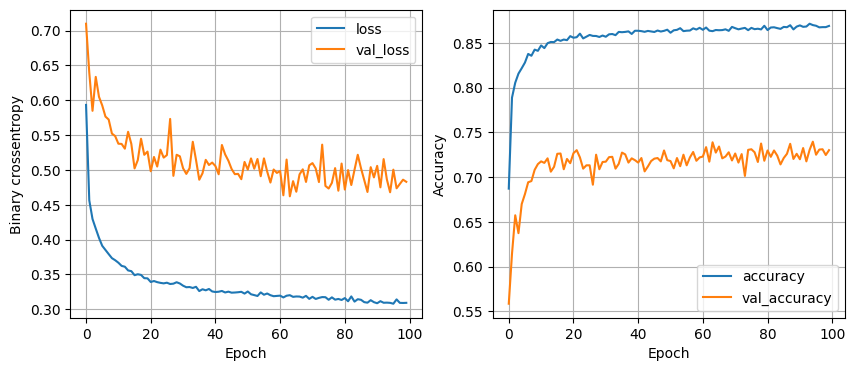

119/119 [==============================] - 0s 2ms/step - loss: 0.3126 - accuracy: 0.8680
num_nodes:64, dropout_prob:0, 'LR':0.01, batch_size:32


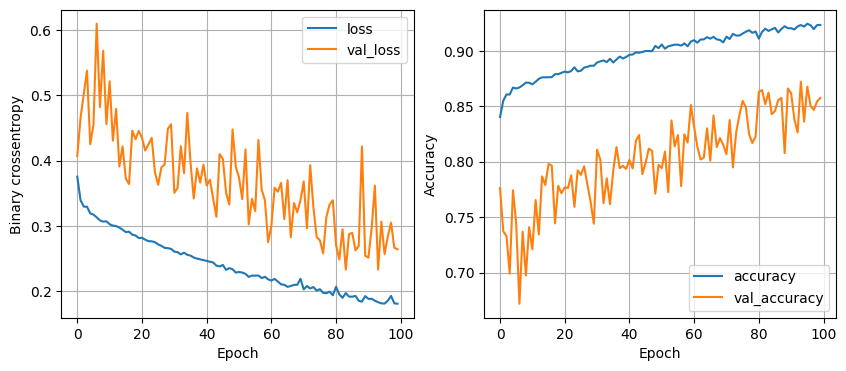

119/119 [==============================] - 0s 2ms/step - loss: 0.5305 - accuracy: 0.8491
num_nodes:64, dropout_prob:0, 'LR':0.01, batch_size:64


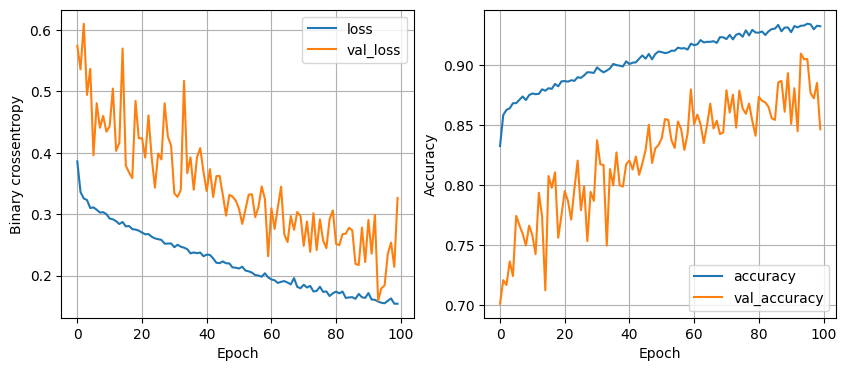

119/119 [==============================] - 0s 2ms/step - loss: 0.6058 - accuracy: 0.8494
num_nodes:64, dropout_prob:0, 'LR':0.01, batch_size:128


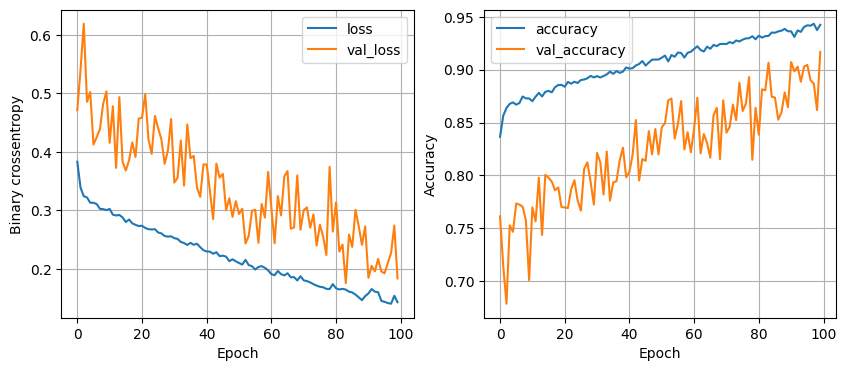

119/119 [==============================] - 0s 2ms/step - loss: 0.6466 - accuracy: 0.8436
num_nodes:64, dropout_prob:0, 'LR':0.005, batch_size:32


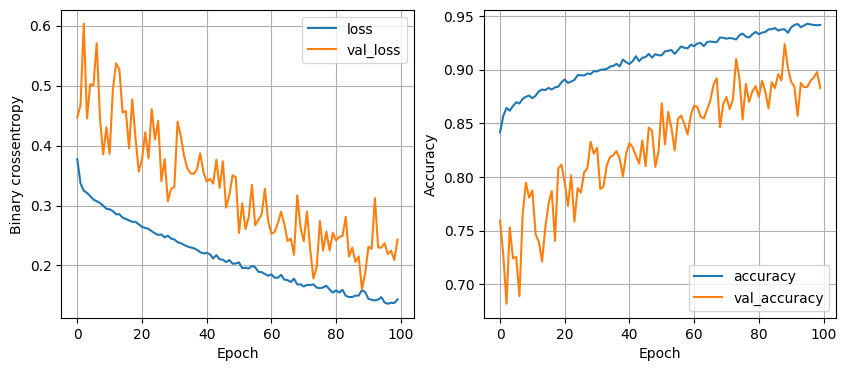

119/119 [==============================] - 0s 2ms/step - loss: 0.6801 - accuracy: 0.8546
num_nodes:64, dropout_prob:0, 'LR':0.005, batch_size:64


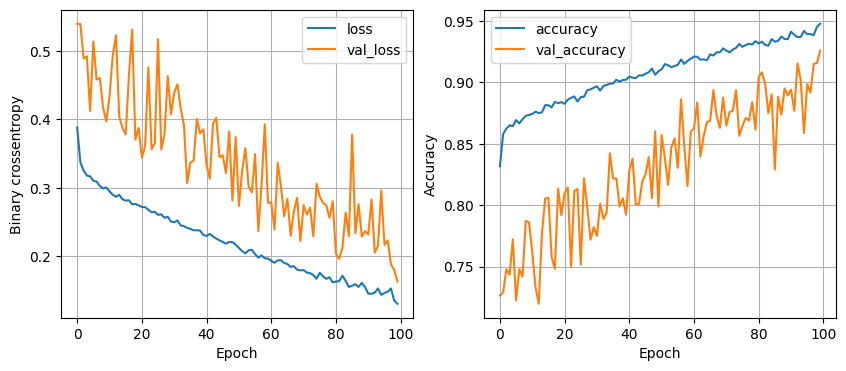

119/119 [==============================] - 0s 2ms/step - loss: 0.6028 - accuracy: 0.8325
num_nodes:64, dropout_prob:0, 'LR':0.005, batch_size:128


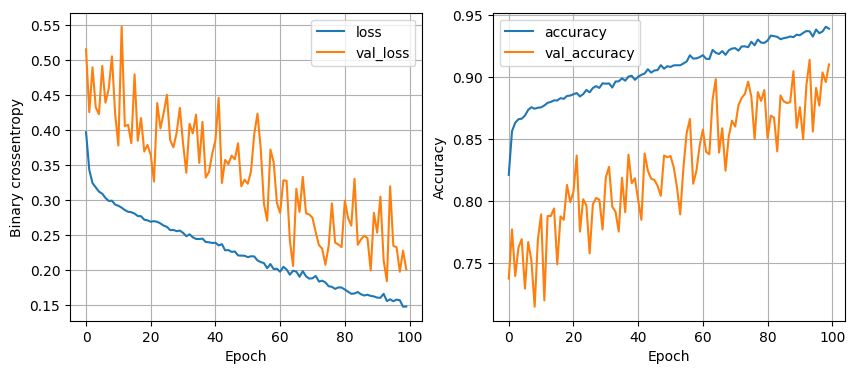

119/119 [==============================] - 0s 2ms/step - loss: 0.5146 - accuracy: 0.8452
num_nodes:64, dropout_prob:0, 'LR':0.001, batch_size:32


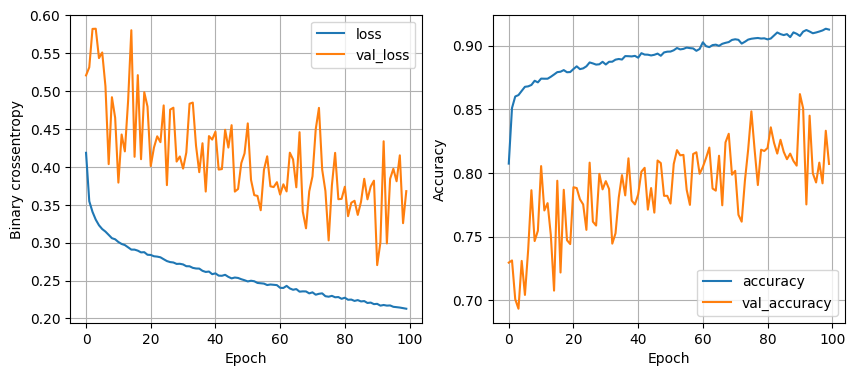

119/119 [==============================] - 0s 2ms/step - loss: 0.3659 - accuracy: 0.8633
num_nodes:64, dropout_prob:0, 'LR':0.001, batch_size:64


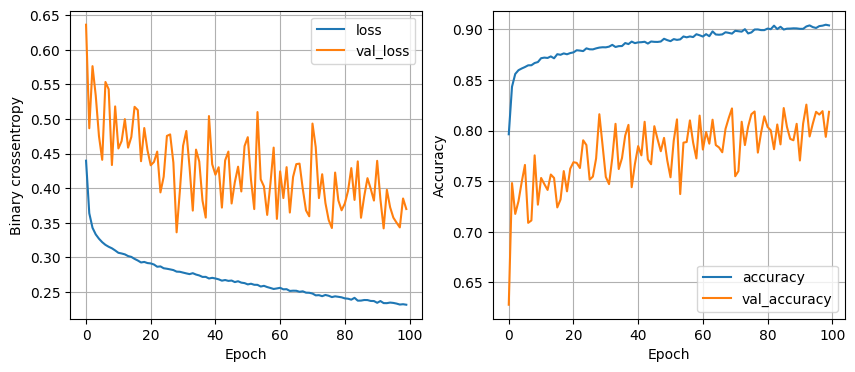

119/119 [==============================] - 0s 2ms/step - loss: 0.3479 - accuracy: 0.8604
num_nodes:64, dropout_prob:0, 'LR':0.001, batch_size:128


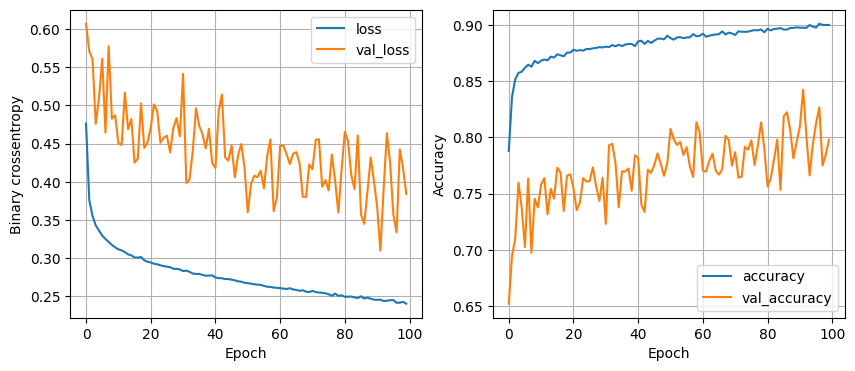

119/119 [==============================] - 0s 2ms/step - loss: 0.3347 - accuracy: 0.8649
num_nodes:64, dropout_prob:0.2, 'LR':0.01, batch_size:32


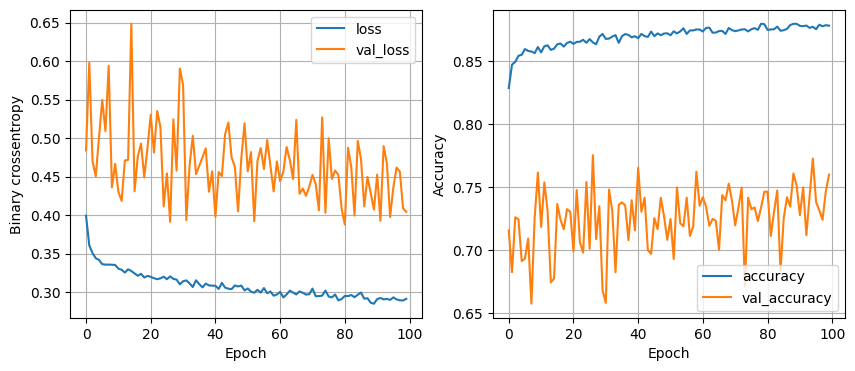

119/119 [==============================] - 0s 2ms/step - loss: 0.3340 - accuracy: 0.8699
num_nodes:64, dropout_prob:0.2, 'LR':0.01, batch_size:64


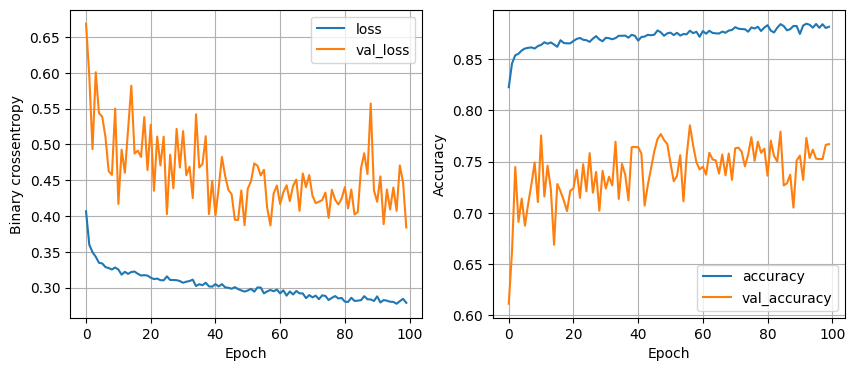

119/119 [==============================] - 0s 2ms/step - loss: 0.3166 - accuracy: 0.8730
num_nodes:64, dropout_prob:0.2, 'LR':0.01, batch_size:128


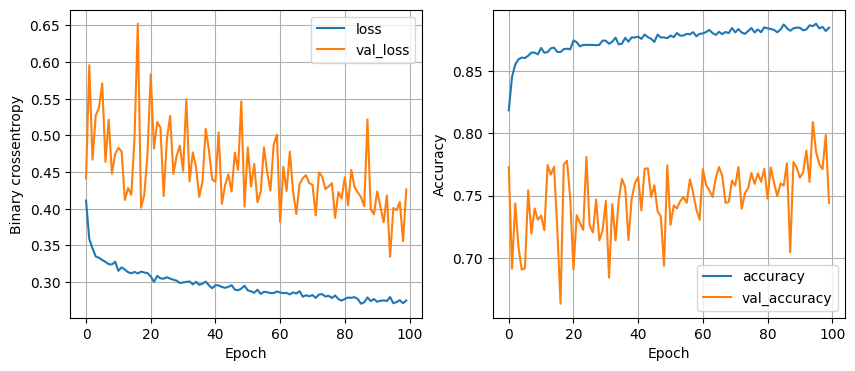

119/119 [==============================] - 0s 2ms/step - loss: 0.3243 - accuracy: 0.8667
num_nodes:64, dropout_prob:0.2, 'LR':0.005, batch_size:32


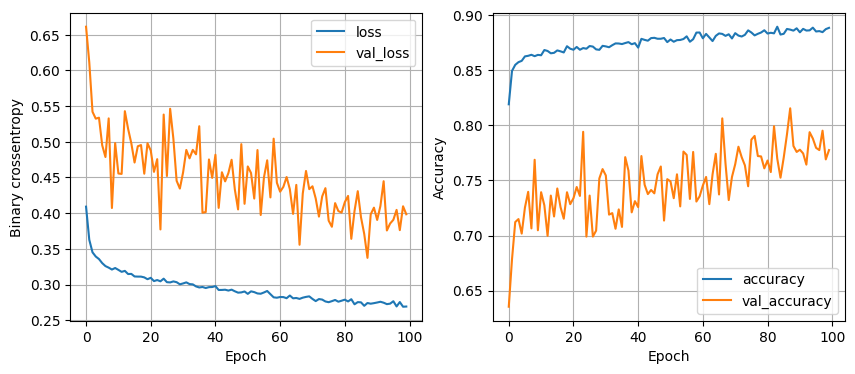

119/119 [==============================] - 0s 2ms/step - loss: 0.3200 - accuracy: 0.8715
num_nodes:64, dropout_prob:0.2, 'LR':0.005, batch_size:64


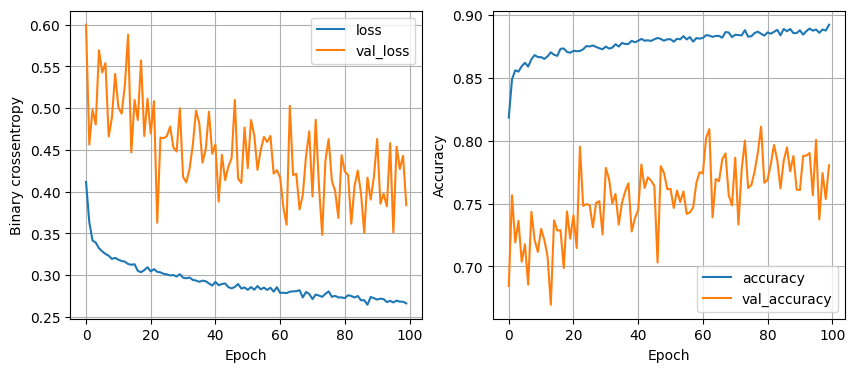

119/119 [==============================] - 0s 2ms/step - loss: 0.3182 - accuracy: 0.8725
num_nodes:64, dropout_prob:0.2, 'LR':0.005, batch_size:128


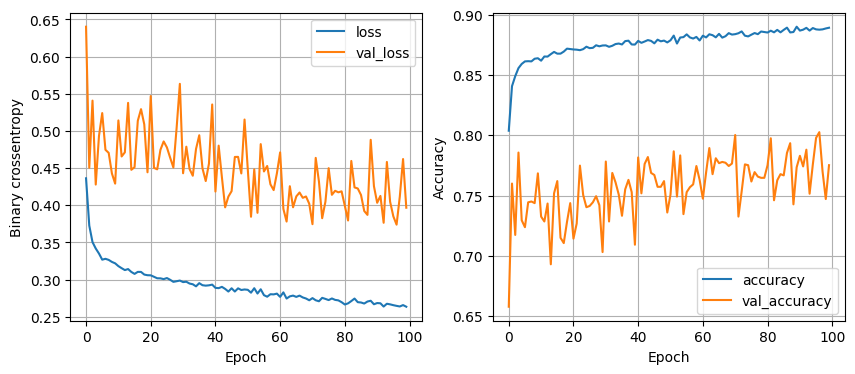

119/119 [==============================] - 0s 2ms/step - loss: 0.3171 - accuracy: 0.8675
num_nodes:64, dropout_prob:0.2, 'LR':0.001, batch_size:32


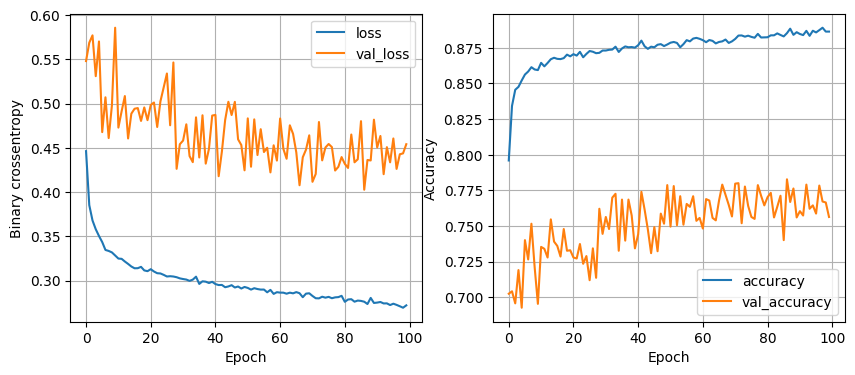

119/119 [==============================] - 0s 2ms/step - loss: 0.3089 - accuracy: 0.8717
num_nodes:64, dropout_prob:0.2, 'LR':0.001, batch_size:64


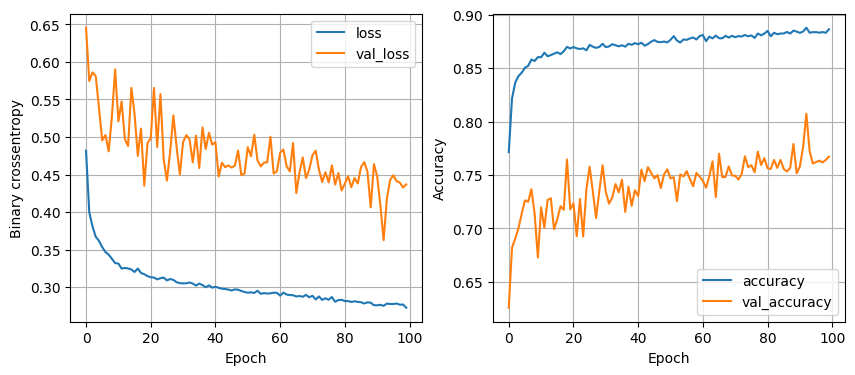

119/119 [==============================] - 0s 3ms/step - loss: 0.3113 - accuracy: 0.8707
num_nodes:64, dropout_prob:0.2, 'LR':0.001, batch_size:128


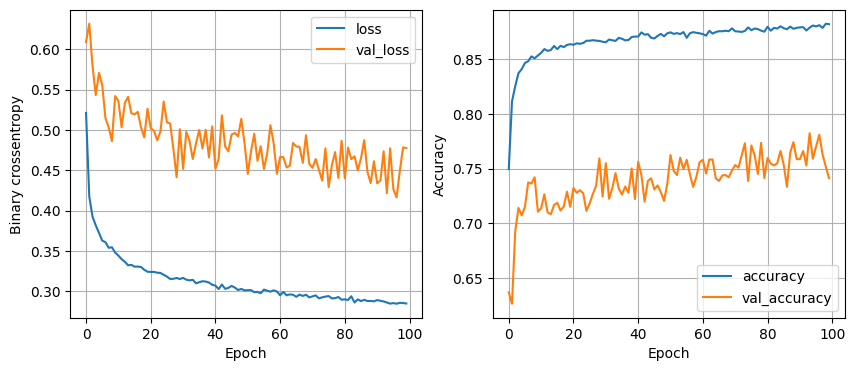

119/119 [==============================] - 0s 2ms/step - loss: 0.3010 - accuracy: 0.8715


In [56]:
least_val_loss = float('inf')  # to record validation loss
least_loss_model = None
epochs=100
for num_nodes in [32, 64]:
  for dropout_prob in [0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"num_nodes:{num_nodes}, dropout_prob:{dropout_prob}, 'LR':{lr}, batch_size:{batch_size}")
        model, history = train_model(Xtrain, ytrain, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(Xvalid, yvalid)[0]
        if val_loss < least_val_loss:
            least_val_loss = val_loss
            least_loss_model = model   # to get the least loss model

In [57]:
ypred = least_loss_model.predict(Xtest)
ypred = (ypred>0.5).astype(int).reshape(-1,)
ypred

119/119 [==============================] - 0s 2ms/step


array([1, 0, 0, ..., 1, 1, 0])

In [58]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.87      0.75      0.81      1341
           1       0.87      0.94      0.90      2463

    accuracy                           0.87      3804
   macro avg       0.87      0.84      0.86      3804
weighted avg       0.87      0.87      0.87      3804

